<a href="https://colab.research.google.com/github/AmericaNC/Alumno/blob/main/Copia_de_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Split_smol/train/Actinic keratosis/ISIC_0024468.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0024470.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0024707.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0024763.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0024771.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0024800.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0024913.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0024948.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0025780.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0025953.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0025957.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0025992.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0026149.jpg  
  inflating: Split_smol/train/Actinic keratosis/ISIC_0026171.jpg  
  inflating: Split_smol/train/Actinic ke

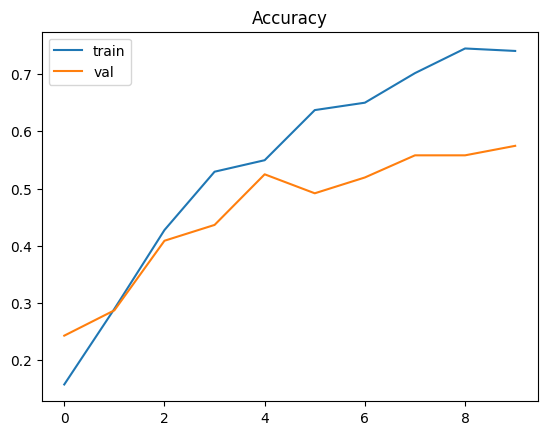

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.title("Accuracy")
plt.show()

In [ ]:
model.save("skin_disease_model_retraining.keras")

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 402ms/step - accuracy: 0.1218 - loss: 3.1648 - val_accuracy: 0.2431 - val_loss: 2.1060
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.2801 - loss: 1.8976 - val_accuracy: 0.2873 - val_loss: 1.7394
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.3914 - loss: 1.7294 - val_accuracy: 0.4088 - val_loss: 1.5009
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.4827 - loss: 1.3332 - val_accuracy: 0.4365 - val_loss: 1.5257
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.5122 - loss: 1.2668 - val_accuracy: 0.5249 - val_loss: 1.4312
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.6409 - loss: 0.9425 - val_accuracy: 0.4917 - val_loss: 1.2841
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.6503 - loss: 0.8882 - val_accuracy: 0.5193 - val_loss: 1.4179
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.6780 - loss: 0.7803 - val_accuracy: 0

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 384ms/step


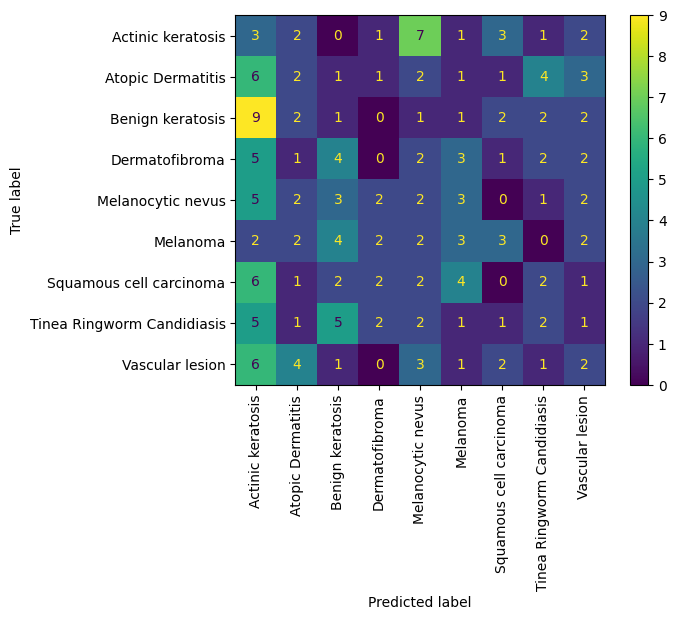

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = np.argmax(model.predict(val_ds), axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(xticks_rotation=90)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))


                            precision    recall  f1-score   support

         Actinic keratosis       0.06      0.15      0.09        20
         Atopic Dermatitis       0.12      0.10      0.11        21
          Benign keratosis       0.05      0.05      0.05        20
            Dermatofibroma       0.00      0.00      0.00        20
         Melanocytic nevus       0.09      0.10      0.09        20
                  Melanoma       0.17      0.15      0.16        20
   Squamous cell carcinoma       0.00      0.00      0.00        20
Tinea Ringworm Candidiasis       0.13      0.10      0.11        20
           Vascular lesion       0.12      0.10      0.11        20

                  accuracy                           0.08       181
                 macro avg       0.08      0.08      0.08       181
              weighted avg       0.08      0.08      0.08       181



In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
normalization = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization(x), y))
val_ds = val_ds.map(lambda x, y: (normalization(x), y))

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Actinic keratosis', 'Atopic Dermatitis', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma', 'Tinea Ringworm Candidiasis', 'Vascular lesion']


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 697 files belonging to 9 classes.
Found 181 files belonging to 9 classes.


In [ ]:
BASE_DIR = "Split_smol"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR = os.path.join(BASE_DIR, "val")

print(f"Base Directory: {BASE_DIR}")
print(f"Training Directory: {TRAIN_DIR}")
print(f"Validation Directory: {VAL_DIR}")

Base Directory: Split_smol
Training Directory: Split_smol/train
Validation Directory: Split_smol/val


In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model_tl = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model_tl.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history_tl = model_tl.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.3285 - loss: 2.0696 - val_accuracy: 0.6133 - val_loss: 1.1971
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.6303 - loss: 1.1071 - val_accuracy: 0.6740 - val_loss: 0.9334
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.7129 - loss: 0.8742 - val_accuracy: 0.7569 - val_loss: 0.7908
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.7907 - loss: 0.6300 - val_accuracy: 0.7348 - val_loss: 0.7460
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.8036 - loss: 0.5862 - val_accuracy: 0.7072 - val_loss: 0.7518
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.8381 - loss: 0.5379 - val_accuracy: 0.7624 - val_loss: 0.7005
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.8563 - loss: 0.4714 - val_accuracy: 0.7680 - val_loss: 0.7118
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.8530 - loss: 0.4317 - val_accuracy: 0.73